## Objective
* __Create your own dataset that contains a random sample of reviews__

## Workflow

1. Read the video game review data. Take a look at the text of the reviews and the ratings, which you will work with in this milestone.Note that your data is not pure JSON, but new line delimited JSON. To be able to read it, install and import  <span style="color:red">ndjson</span>.
2. Create a plot of the ratings of the product. Study the distribution of the five categories.
3. Take a random sample of the reviews by selecting 1500 reviews with rating 1, 500-500-500 reviews with ratings 2, 3, 4, and 1500 reviews with rating 5. This way you get a smaller __balanced__ corpus, on which you will during Milestones 2-4.
4. Take a random sample of the reviews by selecting 100,000 reviews. This way you get a bigger representative corpus, on which you will work in Milestones 4 and 5.
    * If you want to get identical results that are provided as a sample solution, use 42 as a random state.
5. Export your corpora to two separate .csv files. Both of your tables should contain a column for the reviews and a column for the ratings. From now on we call the review text of the JSON key “reviews” and the overall key “ratings.” Name your corpora small_corpus and big_corpus.


In [2]:
!pip install ndjson
import ndjson
import pandas as pd
import numpy as np
import seaborn as sns

In [10]:
import gzip
import ndjson

# reading reviews from json.gz file
with gzip.open('AMAZON_FASHION_5.json.gz', 'rt', encoding='utf-8') as f:
    data = ndjson.load(f)

In [11]:
reviews_df = pd.DataFrame(data)

In [12]:
reviews_df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue/Orange'}",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
1,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Black (3746...",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
2,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue/Gray L...",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
3,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue (37867...",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
4,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue/Pink'}",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN


### Data Dictionry
   * __reviewerID__ - ID of the reviewer, e.g. A2SUAM1J3GNN3B
   * __asin__ - ID of the product, e.g. 0000013714
   * **reviewerName** - name of the reviewer
   * **vote** - helpful votes of the review
   * **style** - a disctionary of the product metadata, e.g., "Format" is "Hardcover"
   * **reviewText** - text of the review
   * **overall** - rating of the product
   * **summary** - summary of the review
   * **unixReviewTime** - time of the review (unix time)
   * **reviewTime** - time of the review (raw)
   * **image** - images that users post after they have received the product


In [13]:
reviews_df.shape

(3176, 12)

In [14]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3176 entries, 0 to 3175
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   overall         3176 non-null   float64
 1   verified        3176 non-null   bool   
 2   reviewTime      3176 non-null   object 
 3   reviewerID      3176 non-null   object 
 4   asin            3176 non-null   object 
 5   style           3107 non-null   object 
 6   reviewerName    3176 non-null   object 
 7   reviewText      3160 non-null   object 
 8   summary         3176 non-null   object 
 9   unixReviewTime  3176 non-null   int64  
 10  vote            297 non-null    object 
 11  image           106 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 276.2+ KB


<Axes: xlabel='overall', ylabel='count'>

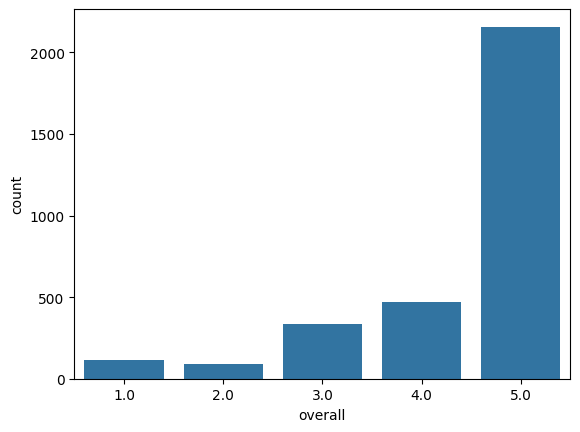

In [15]:
sns.countplot(data = reviews_df, x='overall')

In [16]:
len(reviews_df['asin'].value_counts(dropna=False))

31

### Undersampling of Reviews
Taking a random sample of the reviews by selecting 1500 reviews with rating 1, 500-500-500 reviews with ratings 2, 3, 4, and 1500 reviews with rating 5. This way you get a smaller balanced corpus, on which you will during Milestones 2-4.


In [25]:
one_1500 = reviews_df[reviews_df['overall']==1.0].sample(n=90)
two_500 = reviews_df[reviews_df['overall']==2.0].sample(n=50)
three_500 = reviews_df[reviews_df['overall']==3.0].sample(n=300)
four_500 = reviews_df[reviews_df['overall']==4.0].sample(n=400)
five_1500 = reviews_df[reviews_df['overall']==5.0].sample(n=1500)

In [21]:
print(reviews_df['overall'].value_counts())

overall
5.0    2158
4.0     471
3.0     337
1.0     117
2.0      93
Name: count, dtype: int64


In [26]:
undersampled_reviews = pd.concat([one_1500, two_500, three_500, four_500, five_1500], axis=0)

In [27]:
undersampled_reviews['overall'].value_counts(dropna=False)

,count
overall,
5.0,1500
4.0,400
3.0,300
1.0,90
2.0,50


<Axes: xlabel='overall', ylabel='count'>

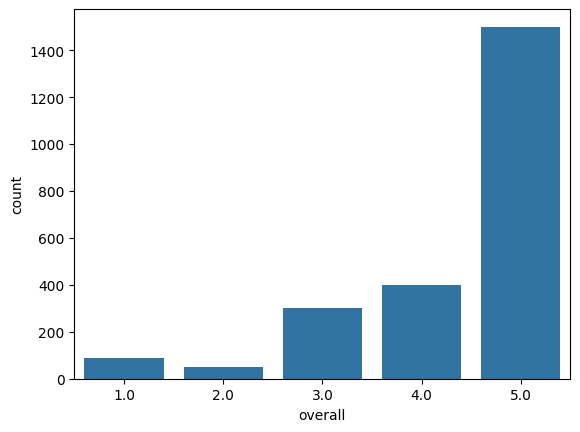

In [28]:
sns.countplot(data=undersampled_reviews, x='overall')

### Random Sampling of 100K Reviews

In [31]:
sample_100K_revs = reviews_df.sample(n=1000, random_state=42)

### Writing Corpora

In [33]:
undersampled_reviews.to_csv("small_corpus.csv", index=False)

In [35]:
sample_100K_revs.to_csv("big_corpus.csv", index=False)